<div>
<img src="figures/svtLogo.png"/>
</div>
<h1><center>Mathematical Optimization for Engineers</center></h1>
<h2><center>Lab 13 - Optimization and Machine learning</center></h2>

In this exercise, we will optimize a machine learning model. First, the model is trained and in the following, we will compute the optimal inputs.

In [1]:
import numpy as np
from assets import utils 

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


from scipy.optimize import fmin,fmin_bfgs, Bounds, minimize

from matplotlib import pyplot as plt

## Johannes M. M. Faust and Ashutosh Manchanda

In [2]:
# Problem statement taken from 
# https://git.rwth-aachen.de/avt-svt/public/MeLOn.git
############################ LOAD DATA ############################ 
# enter data set information
problem_name = "peaks"
# enter file name of training data - 
filename_data = "./assets/peaks.csv"
# dimensionality of the data
input_dim = 2
output_dim = 1
# scale Input to [-1,1] range
scaleInput = True
# normalize Output to z-score
normalizeOutput = False # was true

data = np.loadtxt(open(filename_data, "rb"), delimiter=",")
X = data[:, :-output_dim]
y = data[:, input_dim:]
X_norm = utils.scale(X, scaleInput)
y_norm = utils.normalize(y, normalizeOutput)
x_train, x_val, y_train, y_val = train_test_split(X_norm, y_norm, test_size=0.15)
n_train = x_train.shape[0]




In [26]:
# training of artificial neural network
# use relu and (10,10,10) as layer architecture
# your code here
regr = MLPRegressor(random_state=42, max_iter=50000, hidden_layer_sizes=(10, 10, 10), activation="relu", solver="lbfgs")
regr.fit(x_train, np.ravel(y_train))

print('R2 for validation data of ANN is: ', regr.score(x_val, y_val))

R2 for validation data of ANN is:  0.9889809026779646


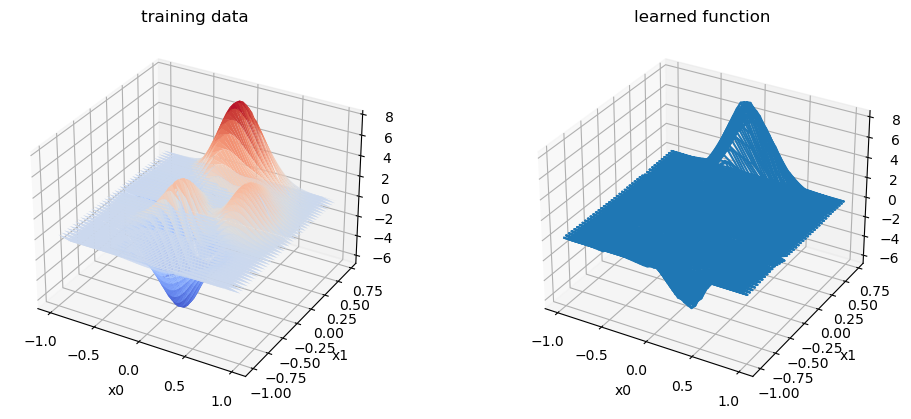

In [27]:
# plotting
y_pred = regr.predict(X_norm)
n_rt = np.sqrt(n_train).astype(int) 
X = np.zeros((n_rt, n_rt))
Y = np.zeros((n_rt, n_rt))
Z_true = np.zeros((n_rt, n_rt))
Z_pred = np.zeros((n_rt, n_rt))
for i in range(n_rt):
    for j in range(n_rt):
        X[i, j] = X_norm[i * n_rt + j, 0]
        Y[i, j] = X_norm[i * n_rt + j, 1]
        Z_true[i, j] = y_norm[i * n_rt + j]
        Z_pred[i, j] = y_pred[i * n_rt + j]

fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
cmap = plt.get_cmap('coolwarm')
ax.plot_surface(X, Y, Z_true, cmap=cmap)
ax.set_title('training data')
ax.set_xlabel('x0')
ax.set_ylabel('x1')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, Z_pred)
ax.set_title('learned function')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
plt.show()


In [28]:
def objective_function(x): 
    return regr.predict(x.reshape(-1,2))

In [29]:
# optimize embedded ANN model with different initial guesses
bnds = Bounds(-1.0, 1.0)

# minimze the trained ANN using several different initial guesses
# your code here
initial_guesses = (np.random.rand(10,2) * 2) - 1
for guess in initial_guesses:
    sol = minimize(objective_function, guess, bounds=bnds, method="L-BFGS-B")
    print(f"initial guess [{guess[0]:.3f}, {guess[1]:.3f}] \t minimum: {sol.fun}")


initial guess [0.749, -0.279] 	 minimum: -6.712836723599751
initial guess [0.595, 0.967] 	 minimum: -0.11425954507214386
initial guess [0.489, 0.933] 	 minimum: -0.1131616332050912
initial guess [-0.849, -0.029] 	 minimum: -2.999471558905011
initial guess [0.917, 0.678] 	 minimum: -0.1161211550675082
initial guess [-0.976, -0.559] 	 minimum: -0.17176183109899268
initial guess [-0.057, 0.086] 	 minimum: -0.11612115679737067
initial guess [-0.768, 0.929] 	 minimum: -2.999471572088454
initial guess [0.457, -0.847] 	 minimum: -6.712772048620323
initial guess [0.414, 0.924] 	 minimum: -0.11612115622260022
